<a href="https://colab.research.google.com/github/Habeebhassan/Datafest_Fraud_Detection/blob/main/Datafest_Fraud_Detection_for_Online_Payment_Platform.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Introduction**

Online transactions have become increasingly popular, and this trend is expected to continue in the future, according to various surveys and research. However, this growth has also led to an increase in fraudulent transactions. Despite the implementation of various security systems, a significant amount of money is still being lost due to fraudulent transactions. Online fraud transactions occur when a person uses someone else’s credit card for personal reasons without the owner or the card-issuing authorities being aware of it. This project aims to address this issue.

**Project Scope**

The Online Fraud Transaction Detection System is an extension of an existing system. The algorithms built using this system will go through the dataset and provide the appropriate output. In the long run, this system will be beneficial as it provides an efficient way to create a secure transaction system to analyze and detect fraudulent transactions. The Proposed algorithm algorithm used in this project is XGBOOST. Xgboost algorithm is a popular and efficient open-source implementation of the gradient boosted trees algorithm. Gradient boosting is a supervised learning algorithm that attempts to accurately predict a target variable by combining the estimates of a set of simpler, weaker models. This accuracy can be increased further by providing a huge dataset for model training. The scope of this application is far-reaching, and it can be used to detect the features of fraud transactions in datasets that are applicable in various sectors such as banking, insurance, e-commerce, money transfer, bill payments, etc. This will help increase security.

**Work Flow**

- Load DataSet
- Data Preprocessing
- Feature Selection/Feature Engineering
- Classification
- XGboost Model Training
- Prediction
- Evaluation

After preprocessing and feature engineering is done, I'll divide the data into two sets: a training set and a separate test set that will be used exclusively at the final stage of model development. This ensures an unbiased assessment of the model's performance on entirely new data.

Next, I'll go through the following steps to construct and assess the model:

Hyperparameter Tuning with Cross Validation: Given the considerable number of hyperparameters in XGBoost, I'll employ Bayesian hyperparameter tuning. This approach is more efficient compared to grid or random search. I'll use (stratified) K-fold cross validation to identify the combination of hyperparameters that yields the highest cross-validated Conditional Recall score.

Determining Thresholds: The refined classifier from step one can assign a probability score to any given example. To classify an example, a probability threshold must be chosen. This threshold separates positive (fraud) and negative examples. While the standard practice is to set the threshold at 0.5, I'll explore empirical thresholding to strike a balance between precision and recall. This may lead to a higher recall rate by selecting an appropriate classification threshold.

Training and Testing: Using the entire training set, I'll train the model and then assess its performance on the test set using the discussed Conditional Recall metric.

Additionally, I'll conclude by comparing the performance of this model with a few other algorithms. While the ideal approach would involve nested cross-validation for comparing different models (e.g., XGBoost vs. Logistic Regression), this is computationally demanding. Therefore, I'll report the performance of these models based on a single test set.






**Proposed Algorithm**

The XGBoost algorithm, short for Extreme Gradient Boosting, is a powerful implementation of the gradient boosting method. Gradient boosting is an ensemble learning technique that sequentially trains simple models, often shallow decision trees, with a focus on areas of the data that haven't been well predicted so far. The final prediction of the model is a weighted combination of these weak learners. XGBoost has demonstrated remarkable effectiveness in various regression and classification tasks.

For this task, I'll employ the XGBClassifier class from the xgboost package's Python API. This classifier utilizes the Extreme Gradient Boosting algorithm to optimize a specified loss function. In this case, I'll be using a logistic loss function, which is also the default choice in xgboost for two-class classification tasks.

**Bayesian Hyper-parameter Optimization**

Bayesian hyper-parameter optimization commences by assuming a prior distribution for the model's parameters. In each iteration, it seeks to glean insights from previously assessed parameter values, updating this distribution to select values more likely to yield high scores in future trials. This stands in contrast to random and grid search methods, which explore the parameter space without leveraging past trials for guidance. As a result, Bayesian hyper-parameter tuning has demonstrated superior efficiency compared to both random search and grid search, particularly in scenarios where evaluating the objective function is resource-intensive and time-consuming, or when dealing with a high-dimensional parameter-space.

In the visual representation, the grey dots represent results from random search, while the green dots depict outcomes from Bayesian optimization (utilizing the Tree Parzen Estimator or TPE). Each dot signifies the lowest validation set error achieved within a specific number of trials for the respective method. It's evident that Bayesian optimization outperforms random search, and it does so with fewer iterations.






**Optimizing Hyperparameters Using Hyperopt**

For fine-tuning the model's hyperparameters, I'll employ the Hyperopt package, which employs Bayesian optimization technique

**Necessary Libraries**

In [3]:
print("Installing necessary libraries")
!pip install pyforest
!pip install category_encoders

print("Installing necessary libraries")
!pip install pyforest
!pip install category_encoders

print("Mounting Google drive to load data")
from google.colab import drive
drive.mount('/content/gdrive')

print("lmporting libraries")
from pyforest import *

Installing necessary libraries
Installing necessary libraries
Mounting Google drive to load data
Mounted at /content/gdrive
lmporting libraries


# Other Relevant libraries


In [4]:
import pandas as pd
import numpy as np
# For Bayesian hyper-parameter optimization
import hyperopt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import make_scorer, precision_recall_curve, recall_score, precision_score
from functools import partial
# To supress a deprecation warning caused due to an issue between XGBoost and SciPy
import warnings

MIN_PRECISION = 0.05

# The current version of XGBoost uses a conditional statement that
# the current version SciPy (internally used by XGBoost) doesn't like.
# This supresses SciPy's deprecation warning message
warnings.filterwarnings('ignore', category = DeprecationWarning)


Load Dataset from Gdrive to save resources on Local computer

In [5]:
data = pd.read_csv('gdrive/MyDrive/Fraud_Detection_Dataset.csv')

In [6]:
data['Fraudulent Flag'].value_counts()

0    3000094
1    2999906
Name: Fraudulent Flag, dtype: int64

In [7]:
data.columns

Index(['Transaction ID', 'User ID', 'Transaction Amount',
       'Transaction Date and Time', 'Merchant ID', 'Payment Method',
       'Country Code', 'Transaction Type', 'Device Type', 'IP Address',
       'Browser Type', 'Operating System', 'Merchant Category', 'User Age',
       'User Occupation', 'User Income', 'User Gender', 'User Account Status',
       'Transaction Status', 'Location Distance', 'Time Taken for Transaction',
       'Transaction Time of Day', 'User's Transaction History',
       'Merchant's Reputation Score', 'User's Device Location',
       'Transaction Currency', 'Transaction Purpose', 'User's Credit Score',
       'User's Email Domain', 'Merchant's Business Age',
       'Transaction Authentication Method', 'Fraudulent Flag'],
      dtype='object')

In [8]:
data.dtypes

Transaction ID                         int64
User ID                                int64
Transaction Amount                   float64
Transaction Date and Time             object
Merchant ID                            int64
Payment Method                        object
Country Code                          object
Transaction Type                      object
Device Type                           object
IP Address                            object
Browser Type                          object
Operating System                      object
Merchant Category                     object
User Age                               int64
User Occupation                       object
User Income                          float64
User Gender                           object
User Account Status                   object
Transaction Status                    object
Location Distance                    float64
Time Taken for Transaction           float64
Transaction Time of Day               object
User's Tra

**Data Preprocessing**

In [9]:
X = data.copy()

In [10]:
# # # handling IP Address with high cardinality

# # Calculate the frequency of each IP address
# ip_address_counts = X['IP Address'].value_counts(normalize=True)

# # Create a new column with the frequency of each IP address
# X['IP Address Frequency'] = X['IP Address'].map(ip_address_counts)

# # Replacing missing values (if any) with 0 (assuming you want to treat unseen IPs as less common)
# X['IP Address Frequency'].fillna(0, inplace=True)

# # Hashing function IP addresses
ip_addresses = X['IP Address'] #['192.168.0.1', '10.0.0.1', '172.16.0.1', '192.168.0.2']

def hash_ip(ip):
    return hash(ip) % (10**8)  # Modulo to limit to a certain range of values

hashed_ips = [hash_ip(ip) for ip in ip_addresses]
print(hashed_ips)
X['hashed_ips'] = hashed_ips


# embedding IP Address column due to its large number of unique values
# !pip install gensim
# from gensim.models import Word2Vec

# ip_addresses = X['IP Address']

# # Tokenize IP addresses
# tokenized_ips = [ip.split('.') for ip in ip_addresses]

# # Train Word2Vec model
# model = Word2Vec(sentences=tokenized_ips, vector_size=4, window=1, min_count=1, sg=0)

# # Get embeddings for IP addresses
# embedded_IP = [model.wv[ip] for ip in tokenized_ips]
# X['embedded_IP'] = [np.mean(embedding) for embedding in embedded_IP]

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [11]:
X.drop('IP Address', axis=1, inplace=True)

In [12]:
X['hashed_ips'].dtypes

dtype('int64')

In [13]:
X['Transaction Date and Time'] = pd.to_datetime(X['Transaction Date and Time'])
X['Day of the Week'] = X['Transaction Date and Time'].dt.dayofweek
X['Hour of the Day'] = X['Transaction Date and Time'].dt.hour

In [14]:
# Converting obeject to category
cat_col = X.dtypes[X.dtypes == 'object'].index.tolist()
for col in cat_col:
  X[col] = X[col].astype('category')
cat_col = X.dtypes[X.dtypes == 'category'].index.tolist()
X[cat_col].nunique()

Payment Method                       40
Country Code                         40
Transaction Type                     38
Device Type                          38
Browser Type                         39
Operating System                     40
Merchant Category                    40
User Occupation                      26
User Gender                           7
User Account Status                  18
Transaction Status                   40
Transaction Time of Day               3
User's Device Location               40
Transaction Currency                 40
Transaction Purpose                  38
User's Email Domain                  40
Transaction Authentication Method    39
dtype: int64

In [15]:
X[cat_col].dtypes

Payment Method                       category
Country Code                         category
Transaction Type                     category
Device Type                          category
Browser Type                         category
Operating System                     category
Merchant Category                    category
User Occupation                      category
User Gender                          category
User Account Status                  category
Transaction Status                   category
Transaction Time of Day              category
User's Device Location               category
Transaction Currency                 category
Transaction Purpose                  category
User's Email Domain                  category
Transaction Authentication Method    category
dtype: object

In [16]:
# Saving preprocessed dataset. this is to conserve memory usage
#X.to_csv('gdrive/MyDrive/edited_Fraud_Detection_Dataset.csv', index=False)

In [17]:
# X = pd.read_csv('gdrive/MyDrive/edited_Fraud_Detection_Dataset.csv')
# cat_col = X.dtypes[X.dtypes == 'categoryt'].index.tolist()

**Feature Engineering**

In [18]:
# for variables with large number of unique values, frequency encoding seems to be the best shot

for column in ['Payment Method', 'Country Code', 'Transaction Type', 'Transaction Authentication Method', 'Device Type', 'Browser Type', 'Operating System', 'Merchant Category', 'Transaction Status', 'User\'s Device Location', 'Transaction Currency', 'Transaction Purpose', 'User\'s Email Domain']:
    frequency_counts = X[column].value_counts(normalize=True)
    X[column + '_Frequency'] = X[column].map(frequency_counts)

In [19]:
# Remove moderate number of unique values

# X_encoded = pd.get_dummies(X, columns=['User Occupation', 'User Account Status'])
X_encoded = pd.get_dummies(X, columns=['Transaction Time of Day'])

In [20]:
from sklearn.preprocessing import LabelEncoder

# List of features to label encode
features_to_label_encode = ['User Occupation', 'User Gender', 'User Account Status']

# Apply label encoding
label_encoder = LabelEncoder()
for feature in features_to_label_encode:
    X_encoded[feature + '_Encoded'] = label_encoder.fit_transform(X_encoded[feature])


In [21]:
X_encoded.columns

Index(['Transaction ID', 'User ID', 'Transaction Amount',
       'Transaction Date and Time', 'Merchant ID', 'Payment Method',
       'Country Code', 'Transaction Type', 'Device Type', 'Browser Type',
       'Operating System', 'Merchant Category', 'User Age', 'User Occupation',
       'User Income', 'User Gender', 'User Account Status',
       'Transaction Status', 'Location Distance', 'Time Taken for Transaction',
       'User's Transaction History', 'Merchant's Reputation Score',
       'User's Device Location', 'Transaction Currency', 'Transaction Purpose',
       'User's Credit Score', 'User's Email Domain', 'Merchant's Business Age',
       'Transaction Authentication Method', 'Fraudulent Flag', 'hashed_ips',
       'Day of the Week', 'Hour of the Day', 'Payment Method_Frequency',
       'Country Code_Frequency', 'Transaction Type_Frequency',
       'Transaction Authentication Method_Frequency', 'Device Type_Frequency',
       'Browser Type_Frequency', 'Operating System_Frequency

In [22]:
# Removing Original Columns
# List of original categorical columns to remove
categorical_columns_to_remove = ['User Occupation', 'User Gender', 'User Account Status','Payment Method', 'Country Code', 'Transaction Type', 'Transaction Authentication Method', 'Device Type', 'Browser Type', 'Operating System', 'Merchant Category', 'Transaction Status', 'User\'s Device Location', 'Transaction Currency', 'Transaction Purpose', 'User\'s Email Domain']

# Drop the original categorical columns
X_encoded = X_encoded.drop(columns=categorical_columns_to_remove)

In [23]:
cat_obj = X_encoded.dtypes[X_encoded.dtypes=='category'].index.tolist()
for col in cat_obj:
  X_encoded[col] = X_encoded[col].astype('float64')

In [24]:
X_encoded.dtypes


Transaction ID                                          int64
User ID                                                 int64
Transaction Amount                                    float64
Transaction Date and Time                      datetime64[ns]
Merchant ID                                             int64
User Age                                                int64
User Income                                           float64
Location Distance                                     float64
Time Taken for Transaction                            float64
User's Transaction History                              int64
Merchant's Reputation Score                           float64
User's Credit Score                                     int64
Merchant's Business Age                                 int64
Fraudulent Flag                                         int64
hashed_ips                                              int64
Day of the Week                                         int64
Hour of 

In [25]:
X_encoded.shape

(6000000, 36)

In [26]:
X_encoded.drop('Transaction Date and Time', axis=1, inplace=True)

In [27]:
X_encoded.dtypes=="category"

Transaction ID                                 False
User ID                                        False
Transaction Amount                             False
Merchant ID                                    False
User Age                                       False
User Income                                    False
Location Distance                              False
Time Taken for Transaction                     False
User's Transaction History                     False
Merchant's Reputation Score                    False
User's Credit Score                            False
Merchant's Business Age                        False
Fraudulent Flag                                False
hashed_ips                                     False
Day of the Week                                False
Hour of the Day                                False
Payment Method_Frequency                       False
Country Code_Frequency                         False
Transaction Type_Frequency                    

In [28]:
small_data = X_encoded.sample(n=1000000, random_state=42)

In [29]:
X_data = small_data.drop('Fraudulent Flag', axis = 1)
y_data = small_data['Fraudulent Flag']

# Feature Selection

In [30]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif
selector = SelectKBest(score_func=mutual_info_classif, k=20)
X_selected = selector.fit_transform(X_data, y_data)

In [31]:
# Get the indices of the selected features
selected_indices = selector.get_support(indices=True)

In [32]:
# Get the corresponding feature names
selected_features = X_data.columns[selected_indices]

In [33]:
# Create a DataFrame with selected features
selected_features_df = X_data[selected_features]

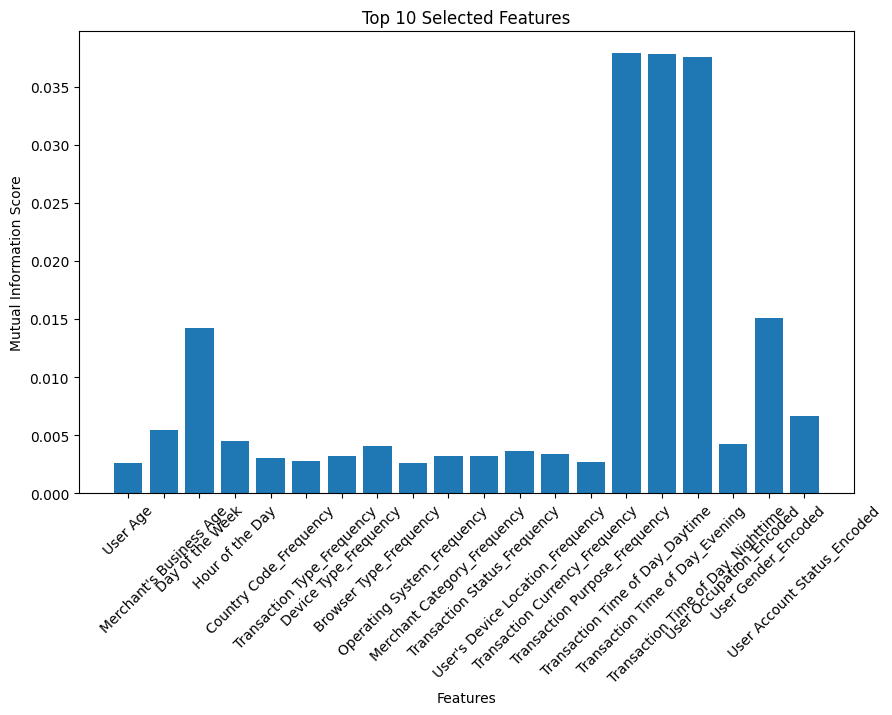

         User Age  Merchant's Business Age  Day of the Week  Hour of the Day  \
1324896        36                        4                3                5   
3566176        27                       19                6                2   
1109043        45                       12                0               12   
4286042        53                       17                2               10   
5395174        53                       12                6               12   
...           ...                      ...              ...              ...   
4560320        34                       14                4                8   
1270093        65                        9                0                9   
5663           37                       10                5               23   
5056311        63                        7                6                8   
4778899        64                       12                1               14   

         Country Code_Frequency  Transa

In [34]:
# Create a visualization (assuming X_selected is a DataFrame)
import matplotlib.pyplot as plt

# Assuming X_selected is a DataFrame
plt.figure(figsize=(10, 6))
plt.bar(selected_features, selector.scores_[selected_indices])
plt.xlabel('Features')
plt.ylabel('Mutual Information Score')
plt.title('Top 10 Selected Features')
plt.xticks(rotation=45)
plt.show()

# view the selected features in a DataFrame
print(selected_features_df)

NameError: ignored

In [38]:
# Splitting
X_train, X_test, y_train, y_test = train_test_split(selected_features_df, y_data, test_size=0.2, stratify=y_data, random_state=0)

In [40]:
# Step 1: Enable GPU in Google Colab
# Go to "Runtime" -> "Change runtime type" -> Select "GPU" -> Click "Save"

# Step 2: Mount Google Drive (Optional, for saving models)
# from google.colab import drive
# drive.mount('/content/gdrive')

# Step 3: Install Required Libraries (if not already installed)
!pip install torch
!pip install scikit-learn

# Import necessary libraries
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Define the model
class FraudDetectionModel(nn.Module):
    def __init__(self, input_size):
        super(FraudDetectionModel, self).__init__()
        self.fc = nn.Linear(input_size, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.fc(x)
        x = self.sigmoid(x)
        return x

# Assuming 'final_df' is your preprocessed DataFrame with features and target variable
# X = final_df.drop(columns=['Fraudulent Flag']).values
# y = final_df['Fraudulent Flag'].values

scaler = StandardScaler()
X = scaler.fit_transform(selected_features_df)

#X_train, X_valid, y_train, y_valid = train_test_split(X, y_data, test_size=0.2, random_state=42)

# Convert data to PyTorch tensors and move to GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
X_train = torch.Tensor(X_train).to(device)
y_train = torch.Tensor(y_train).unsqueeze(1).to(device)
X_valid = torch.Tensor(X_test).to(device)
y_valid = torch.Tensor(y_test).unsqueeze(1).to(device)

# Define the model and move it to GPU
input_size = X_train.shape[1]
model = FraudDetectionModel(input_size).to(device)

# Define Loss Function and Optimizer
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Hyperparameters for fine-tuning
num_epochs = 50
batch_size = 64

# Learning Rate Schedule (adjust as needed)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.5)

# Early Stopping (adjust patience as needed)
best_valid_loss = float('inf')
patience = 5
counter = 0

# Training Loop
for epoch in range(num_epochs):
    model.train()
    for i in range(0, len(X_train), batch_size):
        inputs = X_train[i:i+batch_size]
        labels = y_train[i:i+batch_size]

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

    # Validation
    model.eval()
    with torch.no_grad():
        valid_outputs = model(X_valid)
        valid_loss = criterion(valid_outputs, y_valid)

        # Adjust learning rate
        scheduler.step()

        # Early stopping
        if valid_loss < best_valid_loss:
            best_valid_loss = valid_loss
            counter = 0
            # Optional: Save the best model
            torch.save(model.state_dict(), '/content/gdrive/My Drive/best_fraud_detection_model.pth')
        else:
            counter += 1
            if counter >= patience:
                print(f'Early stopping at epoch {epoch}')
                break

# Optional: Load the best model
model.load_state_dict(torch.load('/content/gdrive/My Drive/best_fraud_detection_model.pth'))

# Evaluate the model
model.eval()
with torch.no_grad():
    valid_outputs = model(X_valid)
    valid_preds = (valid_outputs > 0.5).float()

    accuracy = (valid_preds == y_valid).sum().item() / len(y_valid)
    print(f'Validation Accuracy: {accuracy}')


ValueError: ignored

In [ ]:
# # build the model

# # from imblearn.over_sampling import SMOTE
# # X_resampled, y_resampled = SMOTE().fit_resample(X_train_encoded, y_train_small)
# # X_test_resampled, y_test_resampled = SMOTE().fit_resample(X_test_encoded, y_test_small)

# # X_resampled.drop(['Year', 'Month', 'Day'], axis=1, inplace=True)
# # X_test_resampled.drop(['Year', 'Month', 'Day'], axis=1, inplace=True)


dtrain = xgb.DMatrix(data=X_train, label= y_train, enable_categorical=True)
dtest = xgb.DMatrix(data=X_test, label= y_test, enable_categorical=True)

# # # Assuming 'X_train' and 'y_train' are your training data

# # # Initialize the XGBoost model with categorical support enabled
#model = xgb.XGBClassifier()

# # # Define the parameter grid for hyperparameter tuning
# # param_grid = {
# #     'max_depth': [3, 7],
# #     'min_child_weight': [1, 5],
# #     'subsample': [0.8, 1.0],
# #     'colsample_bytree': [0.8, 1.0],
# #     'learning_rate': [0.1, 0.01, 0.5, 0.9],
# #     'n_estimator': [200]
# # }

# scale_pos_weight = len(y_train[y_train == 0]) / len(y_train[y_train == 1])

params = {
    'min_child_weight': 7,
    'subsample': 0.577,
    'max_depth': 10,
    'reg_lambda': 0.377,
    'learning_rate': 0.017,
    'colsample_bytree': 0.974,
    'reg_alpha': 0.206,
    'objective': 'binary:logistic',
    'eval_metric': 'logloss',
    'n_estimator': [200]

}
# # # Initialize GridSearchCV
# # grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='roc_auc', cv=3, verbose=2, n_jobs=-1,  error_score='raise')

# # # Perform the hyperparameter tuning
# # grid_search.fit(X_train_encoded, y_train_small)

# # # Get the best hyperparameters
# # best_params = grid_search.best_params_

# # # Train the model with the best hyperparameters
best_model = xgb.XGBClassifier(params, verbosity=2)
best_model =xgb.train(params, dtrain, num_boost_round=100)

# # # Evaluate the model
# y_pred = best_model.predict(dtest)
# # accuracy = accuracy_score(y_test_resampled, y_pred)

# # # Display results
# # #print(f'Best Hyperparameters: {best_params}')
# # print(f'Accuracy: {accuracy}')


In [ ]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = best_model.predict(dtest)

#Convert predicted probabilities to binary predictions (0 or 1)
y_pred_binary = [1 if p > 0.5 else 0 for p in y_pred]

#Evaluate model performance
accuracy = accuracy_score(y_test, y_pred_binary)
report = classification_report(y_test, y_pred_binary)

#Display results
print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(report)

In [ ]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.linear_model import LogisticRegression
# from sklearn.ensemble import VotingClassifier

# from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()
# X_standardized = scaler.fit_transform(X_train)
# X_test_standardized = scaler.fit(X_test)

# params = {
#     'objective': 'binary:logistic',
#     'min_child_weight': 7,
#     'subsample': 0.577,
#     'max_depth': 10,
#     'reg_lambda': 0.377,
#     'learning_rate': 0.017,
#     'colsample_bytree': 0.974,
#     'reg_alpha': 0.206,
#     'eval_metric': 'logloss',
#     'scale_pos_weight': scale_pos_weight

# }

# # Initialize base models
# xgb_model = xgb.XGBClassifier(params)
# rf_model = RandomForestClassifier(n_estimators=1500, random_state=42)
# # lr_model = LogisticRegression()

# # Create a voting ensemble
# ensemble_model = VotingClassifier(estimators=[
#     ('xgb', xgb_model),
#     ('rf', rf_model)
#     #('lr', lr_model)
# ], voting='soft')

# # Train the ensemble model
# ensemble_model.fit(X_train, y_train)

# # Evaluate on the test set
# y_pred = ensemble_model.predict(X_test)
# accuracy = accuracy_score(y_test, y_pred)
# print(f'Accuracy: {accuracy}')

In [ ]:
import pandas as pd
import numpy as np
# For Bayesian hyper-parameter optimization
import hyperopt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import make_scorer, precision_recall_curve, recall_score, precision_score
from functools import partial
# To supress a deprecation warning caused due to an issue between XGBoost and SciPy
import warnings

MIN_PRECISION = 0.05

# The current version of XGBoost uses a conditional statement that
# the current version SciPy (internally used by XGBoost) doesn't like.
# This supresses SciPy's deprecation warning message
warnings.filterwarnings('ignore', category = DeprecationWarning)




**Defining the Objective Function for Hyperopt**

To enable Hyperopt to optimize the model, it's essential to establish the objective function for optimization. In this context, the objective function is essentially the cross-validated score of the model, based on the specified hyperparameter combination we aim to assess.

In [ ]:
def objective(params, X, y, X_early_stop, y_early_stop, scorer, n_folds = 10):

    pos_count = y_train.sum()
    neg_count = len(y_train) - pos_count
    imbalance_ratio = neg_count / pos_count

    xgb_clf = XGBClassifier(**params, scale_pos_weight=imbalance_ratio,
                            n_estimators = 2000, n_jobs = 1)

    xgb_fit_params = {'early_stopping_rounds': 50,
                      'eval_metric': ['logloss'],
                      'eval_set': [(X_early_stop, y_early_stop)],
                      'verbose': False
                      }

    cv_score = np.mean(cross_val_score(xgb_clf, X_train, y_train, cv = n_folds,
                               fit_params = xgb_fit_params, n_jobs = -1,
                               scoring = scorer))

    # hypoeropt minimizes the loss, hence the minus sign behind cv_score
    return {'loss': -cv_score, 'status': hyperopt.STATUS_OK, 'params': params}

**Evaluation Metric**

The Conditional Recall metric, which will be incorporated using the scorer argument in the objective function, is outlined as follows. It essentially extracts the recall rate corresponding to the provided precision level from the precision-recall curve. The default precision level (utilized for all reported results here) is fixed at 0.05, but it can be adjusted as required.

In [ ]:
def conditional_recall_score(y_true, pred_proba, precision = MIN_PRECISION):
    # Since the PR curve is discreet it might not contain the exact precision value given
    # So we first find the closest existing precision to the given level
    # Then return the highest recall acheiveable at that precision level
    # Taking max() helps in case PR curve is locally flat
    # with multiple recall values for the same precision
    pr, rc,_ = precision_recall_curve(y_true, pred_proba[:,1])
    return np.max(rc[pr >= min_prec])

**Optimizing the Cross Validated Score**

Next, we'll integrate these components and utilize Hyperopt's optimization function, fmin, to explore the most favorable parameter combination. I'll create a new function that executes this optimization and provides the parameters that yield the highest cross-validated score.

In [ ]:
def tune_xgb(param_space, X_train, y_train, X_early_stop, y_early_stop, n_iter):
    scorer = make_scorer(conditional_recall_score, needs_proba=True)

    # hyperopt.fmin will only pass the parameter values to objective. So we need to
    # create a partial function to bind the rest of the arguments we want to pass to objective
    obj = partial(objective, scorer = scorer, X = X_train, y = y_train,
                  X_early_stop = X_early_stop, y_early_stop = y_early_stop)

    # A trials object that will store the results of all iterations
    trials = hyperopt.Trials()

    hyperopt.fmin(fn = obj, space = param_space, algo = hyperopt.tpe.suggest,
                         max_evals = n_iter, trials = trials)

    # returns the values of parameters from the best trial
    return trials.best_trial['result']['params']

**Parameter Space Specification**

As previously mentioned, Bayesian optimization relies on assuming an initial probability distribution for parameters and refining this distribution with each iteration. Therefore, instead of providing a list of values as in a grid search, we need to specify the prior distributions of parameters. This can be achieved using Hyperopt's built-in probability distribution functions. The dictionary object below outlines the parameter space:

In [ ]:
param_space = {
        'learning_rate': hyperopt.hp.loguniform('learning_rate', np.log(0.01), np.log(0.2)),
        'max_depth': hyperopt.hp.choice('max_depth', [2, 4, 6, 8, 10]),
        'subsample': hyperopt.hp.uniform('subsample', 0.25, 1),
        'colsample_bytree': hyperopt.hp.uniform('colsample_bytree', 0.7, 1.0),
        'min_child_weight': hyperopt.hp.choice('min_child_weight', [1, 3, 5, 7]),
        'reg_alpha': hyperopt.hp.uniform('reg_alhpa', 0, 1.0),
        # Avoiding lambda = 0. There is a Github issue on strange behaviour with lambda = 0
        'reg_lambda': hyperopt.hp.uniform('reg_lambda', 0.01, 1.0),
        }

In [ ]:
def optimal_threshold(estimator, X, y, n_folds = 10, min_prec = 0.05, fit_params = None):

    cv_pred_prob = cross_val_predict(estimator, X, y, method='predict_proba',
                                     cv = n_folds, fit_params=fit_params, n_jobs=-1)[:,1]

    # Once again, the PR curve is discreet and may not contain the exact precision level
    # we are looking for. So, we need to find the closest existing precision
    pr, _, threshold = precision_recall_curve(y, cv_pred_prob)
    # precision is always one element longer than threshold and the last one is always set to 1
    # So I drop the last element of precision so I can use it below to index threshold
    pr = pr[:-1]
    return min(threshold[pr >= min_prec])

In [ ]:
if __name__ == "__main__":
    # Loading the data
    # data = pd.read_csv('creditcard.csv')
    # X = data.drop('Class', axis = 1)
    # y = data['Class']

    # # Train/test split, 80/20, random_state set for reproducibility
    # X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y,
    #                                                     test_size = 0.2, random_state = 1)

    # Further splitting the initial training set so that 10% of all data(1/8 of 80%)
    # can be used as the evaluation set by XGBoost for early stopping
    X_train, X_early_stop, y_train, y_early_stop = train_test_split(X_train, y_train,test_size = 1/8,
                                                                    stratify = y_train, random_state = 1)

    # The prior probability distribution of parameters for Bayesian optimization
    param_space = {
            'learning_rate': hyperopt.hp.loguniform('learning_rate', np.log(0.01), np.log(0.2)),
            'max_depth': hyperopt.hp.choice('max_depth', [2, 4, 6, 8, 10]),
            'subsample': hyperopt.hp.uniform('subsample', 0.25, 1),
            'colsample_bytree': hyperopt.hp.uniform('colsample_bytree', 0.7, 1.0),
            'min_child_weight': hyperopt.hp.choice('min_child_weight', [1, 3, 5, 7]),
            'reg_alpha': hyperopt.hp.uniform('reg_alhpa', 0, 1.0),
            # Avoiding lambda = 0. There is a Github issue on strange behaviour with lambda = 0
            'reg_lambda': hyperopt.hp.uniform('reg_lambda', 0.01, 1.0),
            }

    # # # # # # # # #
    # Step 1: Tuning hyper-parameters of the XGBoost classifier
    # # # # # # # # #
    print('Step 1: Tuning hyper-parameters using Bayesian Optimization\n')

    best_params = tune_xgb(param_space, X_train, y_train, X_early_stop, y_early_stop, n_iter = 150)

    print('\tThe best hyper-parameters found:\n')
    print(*['\t\t%s = %s' % (k, str(round(v, 4))) for k, v in best_params.items()], sep='\n')

    # # # # # # # # #
    # Step 2: Empirical thresholding: finding optimal classification threshold
    # # # # # # # # #
    print('\nStep 2: Empirical Thresholding\n')

    # I use 1500 trees which is very close to optimal n_trees found by early stopping while tuning
    xgboost_clf = XGBClassifier(**best_params, n_estimators=1500)

    classification_cutoff = optimal_threshold(xgboost_clf, X_train, y_train, min_prec = MIN_PRECISION)

    print('\tOptimal classification threshold = %1.3f' % classification_cutoff)

    # # # # # # # # #
    # Setp 3: Training and testing the model
    # # # # # # # # #
    print('\nStep 3: Training and testing the model\n')

    # Training on all the training data (excluding the small validation set to avoid overfitting)
    xgboost_clf.fit(X_train, y_train, verbose = False)

    y_pred = thresholded_predict(X_test, xgboost_clf, threshold = classification_cutoff)

    test_recall = recall_score(y_test, y_pred)
    test_precision = precision_score(y_test, y_pred)

    print('\tTest set performance:')
    print('\tRecall    = %2.3f' % test_recall)
    print('\tPrecision = %2.3f' % test_precision)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.metrics import precision_recall_curve, auc, make_scorer
from sklearn.model_selection import GridSearchCV

logistic_clf = Pipeline(steps = [('Scaler', StandardScaler()),
                                 ('Sampler', SMOTE()),
                                 ('Logistic', LogisticRegression())])

param_grid = {'Logistic__C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]}

scorer = make_scorer(recall_at_precision, needs_proba=True)

grid_search = GridSearchCV(logistic_clf, param_grid, cv = 10,
                           scoring = scorer, refit = True, n_jobs=-1)

grid_search.fit(X_train_all, y_train_all)

# Because of refit = True in GridSearchCV the best estimator has already been fitted to training data
scores = grid_search.best_estimator_.predict_proba(X_test)[:,1]
pr, rc, thrs = precision_recall_curve(y_test, scores)
pr_auc = auc(rc, pr)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_curve, auc, make_scorer
from sklearn.model_selection import GridSearchCV

forest_clf = RandomForestClassifier(n_estimators=100, class_weight='balanced', n_jobs=-1)

param_grid = {'max_features': [None, 'sqrt', 15],
              'min_samples_leaf': [1, 20, 50, 100],
              'max_depth': [4, 10, 20, None]}

grid_search = GridSearchCV(forest_clf, param_grid, cv = 10,
                           scoring = scorer, refit=True)

grid_search.fit(X_train_all, y_train_all)

scores = grid_search.best_estimator_.predict_proba(X_test)[:,1]
pr, rc, thrs = precision_recall_curve(y_test, scores)
pr_auc = auc(rc, pr)